In [122]:
#Import required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
import folium
%matplotlib inline
init_notebook_mode(connected=True)

In [69]:
#Datasets were downloaded from https://www1.nyc.gov/site/nypd/stats/crime-statistics/park-crime-stats.page as .xsls format
#Deletion of unnecessary headers and file convertion from .xsls to .csv took place before upload on Jupyter Notebook
#Read all csv files containing data of different years and different quarter
df1 = pd.read_csv('2019Q2.csv')
df2 = pd.read_csv('2019Q1.csv')
df3 = pd.read_csv('2018Q1.csv')
df4 = pd.read_csv('2018Q2.csv')
df5= pd.read_csv('2018Q3.csv')
df6= pd.read_csv('2018Q4.csv')
df7= pd.read_csv('2017Q1.csv')
df8= pd.read_csv('2017Q2.csv')
df9= pd.read_csv('2017Q3.csv')
df10 = pd.read_csv('2017Q4.csv')
df11= pd.read_csv('2016Q1.csv')
df12= pd.read_csv('2016Q2.csv')
df13= pd.read_csv('2016Q3.csv')
df14 = pd.read_csv('2016Q4.csv')
df15 = pd.read_csv('2015Q1.csv')
df16 = pd.read_csv('2015Q2.csv')
df17 = pd.read_csv('2015Q3.csv')
df18 = pd.read_csv('2015Q4.csv')
df19 = pd.read_csv('2014Q3.csv')
df20 = pd.read_csv('2014Q4.csv')
df21 = pd.read_csv('OpenData_ParksProperties.csv')

In [70]:
#Cleansing of messy coulum headers and bring headers of all tables into same format
df1.columns = df1.columns.str.strip().str.upper().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df2.columns = df2.columns.str.strip().str.upper().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df3.columns = df3.columns.str.strip().str.upper().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df4.columns = df4.columns.str.strip().str.upper().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df5.columns = df5.columns.str.strip().str.upper().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df6.columns = df6.columns.str.strip().str.upper().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df7.columns = df7.columns.str.strip().str.upper().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df8.columns = df8.columns.str.strip().str.upper().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df9.columns = df9.columns.str.strip().str.upper().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df10.columns = df10.columns.str.strip().str.upper().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df11.columns = df11.columns.str.strip().str.upper().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df12.columns = df12.columns.str.strip().str.upper().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df13.columns = df13.columns.str.strip().str.upper().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df14.columns = df14.columns.str.strip().str.upper().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df15.columns = df15.columns.str.strip().str.upper().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df16.columns = df16.columns.str.strip().str.upper().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df17.columns = df17.columns.str.strip().str.upper().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df18.columns = df18.columns.str.strip().str.upper().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df19.columns = df19.columns.str.strip().str.upper().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df20.columns = df20.columns.str.strip().str.upper().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df21.columns = df21.columns.str.strip().str.upper().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [71]:
#Append all dataframes to build a big dataframe with all infomation together 
df = df1.append([df2, df3,  df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19,df20], sort = False)

In [124]:
df.head() #The data in df dataframe

,YEAR,QUARTER,PARK,BOROUGH,SIZE_ACRES,CATEGORY,MURDER,RAPE,ROBBERY,FELONY_ASSAULT,BURGLARY,GRAND_LARCENY,GRAND_LARCENY_OF_MOTOR_VEHICLE,TOTAL
0,2019,2,PELHAM BAY PARK,BRONX,2771.75,ONE ACRE OR LARGER,0,0,0,0,0,0,0,0
1,2019,2,VAN CORTLANDT PARK,BRONX,1146.43,ONE ACRE OR LARGER,0,0,1,0,0,1,0,2
2,2019,2,ROCKAWAY BEACH AND BOARDWALK,QUEENS,1072.56,ONE ACRE OR LARGER,0,0,1,0,1,2,0,4
3,2019,2,FRESHKILLS PARK,STATEN ISLAND,913.32,ONE ACRE OR LARGER,0,0,0,0,0,0,0,0
4,2019,2,FLUSHING MEADOWS CORONA PARK,QUEENS,897.69,ONE ACRE OR LARGER,0,0,3,1,0,8,1,13


In [125]:
#To find out total of all types of crime including total crime BY YEAR
by_year= df.groupby(['YEAR'], as_index = False).agg({'RAPE': np.sum, 'MURDER': np.sum,'ROBBERY': np.sum, 'FELONY_ASSAULT': np.sum,'BURGLARY': np.sum, 'GRAND_LARCENY': np.sum, 'GRAND_LARCENY_OF_MOTOR_VEHICLE': np.sum, 'TOTAL': np.sum})
#Delete rows for 2014 and 2019 since dataset has partial data for these two years and doesn't represent the whole year
by_year = by_year[by_year.YEAR != 2014]
by_year = by_year[by_year.YEAR != 2019]
#Set YEAR coulum as index
by_year.set_index('YEAR',inplace=True)

In [74]:
by_year #The data in by_year dataframe

,RAPE,MURDER,ROBBERY,FELONY_ASSAULT,BURGLARY,GRAND_LARCENY,GRAND_LARCENY_OF_MOTOR_VEHICLE,TOTAL
YEAR,,,,,,,,
2015,20,9,330,198,20,367,7,951
2016,21,9,409,206,23,526,4,1198
2017,26,2,427,234,21,542,7,1259
2018,28,9,359,239,26,530,7,1198


In [75]:
#Scattar plot to plot data in by_year dataframe
by_year.iplot(kind='scatter',xTitle='Year',yTitle='No of Crimes',title='Crimes in NYC Parks by Year')

In [76]:
#Bar plot to plot data in by_year dataframe
by_year.iplot(kind='bar', xTitle='Year',yTitle='No of Crimes',title='Crimes in NYC Parks by Year')

In [77]:
#Stacked bar plot to plot data in by_year dataframe
by_year.iplot(kind='bar', barmode = 'stack', bargap = .40, xanchor = 'center', nticks = 8, xTitle='Year',yTitle='No of Crimes',title='Crimes in NYC Parks by Year')

In [78]:
#Heatmap to plot data in by_year dataframe
by_year.iplot(kind='heatmap', xTitle='Year',yTitle='Crimes',title='Crimes in NYC Parks by Year', nticks=8)

In [79]:
#Create a new dataframe for analyze data grouped BY QUARTER
by_quarter = df.groupby(['YEAR', 'QUARTER'],as_index = False).agg({'RAPE': np.sum, 'MURDER': np.sum,'ROBBERY': np.sum, 'FELONY_ASSAULT': np.sum,'BURGLARY': np.sum, 'GRAND_LARCENY': np.sum, 'GRAND_LARCENY_OF_MOTOR_VEHICLE': np.sum,'TOTAL':np.sum })

In [80]:
by_quarter.head() #The data in by_quarter dataframe

,YEAR,QUARTER,RAPE,MURDER,ROBBERY,FELONY_ASSAULT,BURGLARY,GRAND_LARCENY,GRAND_LARCENY_OF_MOTOR_VEHICLE,TOTAL
0,2014,3,5,0,101,72,15,236,3,432
1,2014,4,2,1,79,26,4,78,1,191
2,2015,1,3,1,41,9,4,24,3,85
3,2015,2,5,2,74,67,5,92,0,245
4,2015,3,4,3,119,93,6,164,2,391


In [81]:
#Bubble plot sized by Rape
by_quarter.iplot(kind='bubble',x='YEAR',y='TOTAL',size='RAPE',xTitle='Year',yTitle='No of Crimes',title='Crimes in NYC Parks Per Year and Quarter Sized by Rape',  nticks = 7)

In [82]:
#Bubble plot sized by Murder
by_quarter.iplot(kind='bubble',x='YEAR',y='TOTAL',size='MURDER',xTitle='Year',yTitle='No of Crimes',title='Crimes in NYC Parks Per Year and Quarter Sized by Murder',  nticks = 7)

In [83]:
#Bubble plot sized by Robbery
by_quarter.iplot(kind='bubble',x='YEAR',y='TOTAL',size='ROBBERY',xTitle='Year',yTitle='No of Crimes',title='Crimes in NYC Parks Per Year and Quarter Sized by Robbery',  nticks = 7)

In [84]:
#Bubble plot sized by Felony Assult
by_quarter.iplot(kind='bubble',x='YEAR',y='TOTAL',size='FELONY_ASSAULT',xTitle='Year',yTitle='No of Crimes',title='Crimes in NYC Parks Per Year and Quarter Sized by Felony Assult',  nticks = 7)

In [85]:
#Bubble plot sized by Burglary
by_quarter.iplot(kind='bubble',x='YEAR',y='TOTAL',size='BURGLARY',xTitle='Year',yTitle='No of Crimes',title='Crimes in NYC Parks Per Year and Quarter Sized by Burglary',  nticks = 7)

In [86]:
#Bubble plot sized by Grand Larceny
by_quarter.iplot(kind='bubble',x='YEAR',y='TOTAL',size='GRAND_LARCENY',xTitle='Year',yTitle='No of Crimes',title='Crimes in NYC Parks Per Year and Quarter Sized by Grand Larceny',  nticks = 7)

In [87]:
#Bubble plot sized by Grand Larceny of Motor Vehicle
by_quarter.iplot(kind='bubble',x='YEAR',y='TOTAL',size='GRAND_LARCENY_OF_MOTOR_VEHICLE',xTitle='Year',yTitle='No of Crimes',title='Crimes in NYC Parks Per Year and Quarter Sized by Grand Larceny of Motor Vehicle',  nticks = 7)

In [88]:
# Dataset Indexed both Year and Quarter
by_quarter2 = df.groupby(['YEAR', 'QUARTER']).agg({'RAPE': np.sum, 'MURDER': np.sum,'ROBBERY': np.sum, 'FELONY_ASSAULT': np.sum, 'BURGLARY': np.sum, 'GRAND_LARCENY': np.sum, 'GRAND_LARCENY_OF_MOTOR_VEHICLE': np.sum,'TOTAL':np.sum })

In [89]:
by_quarter2.head() # Data in dataset by_quarter2

RAPE  MURDER  ROBBERY  FELONY_ASSAULT  BURGLARY  GRAND_LARCENY  \
YEAR QUARTER                                                                   
2014 3           5       0      101              72        15            236   
     4           2       1       79              26         4             78   
2015 1           3       1       41               9         4             24   
     2           5       2       74              67         5             92   
     3           4       3      119              93         6            164   

              GRAND_LARCENY_OF_MOTOR_VEHICLE  TOTAL  
YEAR QUARTER                                         
2014 3                                     3    432  
     4                                     1    191  
2015 1                                     3     85  
     2                                     0    245  
     3                                     2    391

In [90]:
#Barplot on by_quarter2
by_quarter2.iplot(kind='bar', xTitle='Year and Quearter',yTitle='No of Crimes',title='Crimes in NYC Parks Per Year and Quarter')

In [91]:
#Stacked Barplot on by_quarter2
by_quarter2.iplot(kind='bar', barmode = 'stack', xTitle='Year and Quearter',yTitle='No of Crime',title='Crimes in NYC Parks Per Year and Quarter')

In [92]:
#Scatterplot on by_quarter2
by_quarter2.iplot(kind='scatter', xTitle='Year and Quearter',yTitle='No of Crime',title='Crimes in NYC Parks Per Year and Quarter')

In [93]:
#Dataset Indexed only Quarter
by_quarter3 = df.groupby(['QUARTER']).agg({'RAPE': np.sum, 'MURDER': np.sum,'ROBBERY': np.sum, 'FELONY_ASSAULT': np.sum,'BURGLARY': np.sum, 'GRAND_LARCENY': np.sum, 'GRAND_LARCENY_OF_MOTOR_VEHICLE': np.sum,'TOTAL': np.sum })

In [94]:
by_quarter3.head()

,RAPE,MURDER,ROBBERY,FELONY_ASSAULT,BURGLARY,GRAND_LARCENY,GRAND_LARCENY_OF_MOTOR_VEHICLE,TOTAL
QUARTER,,,,,,,,
1,12,1,253,86,15,175,5,547
2,28,12,508,371,22,667,8,1616
3,39,12,611,459,43,1201,9,2374
4,28,7,490,163,36,411,9,1144


In [95]:
#Scatter plot on by_quarter3 
by_quarter3.iplot(kind='scatter', xTitle='Quarter',yTitle='No of Crime',title='Crimes in NYC Parks by Quarter', nticks = 6)

In [96]:
#Bar plot on by_quarter3 
by_quarter3.iplot(kind='bar', xTitle='Quarter',yTitle='No of Crimes',title='Crimes in NYC Parks by Quarter')

In [97]:
#Stacked Bar plot on by_quarter3 
by_quarter3.iplot(kind='bar', barmode = 'stack', xTitle='Quarter',yTitle='No of Crimes',title='Crimes in NYC Parks by Quarter', nticks = 8)

In [98]:
#Dataset Indexed by Park 
by_park = df.groupby(['PARK']).agg({'RAPE': np.sum, 'MURDER': np.sum,'ROBBERY': np.sum, 'FELONY_ASSAULT': np.sum, 'BURGLARY': np.sum, 'GRAND_LARCENY': np.sum, 'GRAND_LARCENY_OF_MOTOR_VEHICLE': np.sum, 'TOTAL': np.sum}).sort_values(by='TOTAL',ascending = False).head(100)

In [126]:
by_park.head()#Data in by_park data frame

,RAPE,MURDER,ROBBERY,FELONY_ASSAULT,BURGLARY,GRAND_LARCENY,GRAND_LARCENY_OF_MOTOR_VEHICLE,TOTAL
PARK,,,,,,,,
FLUSHING MEADOWS CORONA PARK,4,0,41,37,17,173,15,287
RANDALL'S ISLAND PARK,0,0,3,6,5,203,0,217
CONEY ISLAND BEACH & BOARDWALK,6,0,41,22,1,128,0,198
RIVERSIDE PARK,5,0,47,10,9,107,0,178
PROSPECT PARK,7,0,55,26,2,73,0,163


In [100]:
#Stacked Bar plot on by_park data frame
by_park.iplot(kind = 'bar',barmode = 'stack', xTitle='Park',yTitle='No of Crimes',title='Crimes in NYC Parks by Parks')

In [130]:
#Round up SIZE_ACRES field upto 2 decimals
df['SIZE_ACRES'] = df['SIZE_ACRES'].apply(lambda x: round(x, 2))
by_parksize= df.groupby(['PARK', 'SIZE_ACRES'], as_index = False).agg({'TOTAL': np.sum})
by_parksize.set_index('PARK',inplace=True)
by_parksize.head()

,SIZE_ACRES,TOTAL
PARK,,
"""UNCLE"" VITO E. MARANZANO GLENDALE PLAYGROUND",1.15,0
100% PLAYGROUND,1.62,3
A.R.R.O.W. FIELD HOUSE,0.29,0
ABC PLAYGROUND,0.45,0
ABE STARK SKATING RINK,8.81,2


,SIZE_ACRES,TOTAL
PARK,,
"""UNCLE"" VITO E. MARANZANO GLENDALE PLAYGROUND",1.15,0
100% PLAYGROUND,1.62,3
A.R.R.O.W. FIELD HOUSE,0.29,0
ABC PLAYGROUND,0.45,0
ABE STARK SKATING RINK,8.81,2


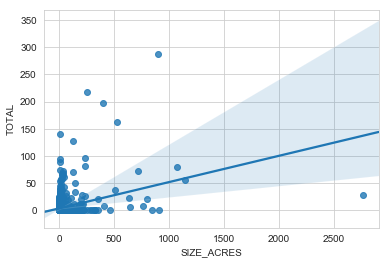

In [107]:
#Regression plot between Park area and total crime. 
sns.regplot(x="SIZE_ACRES", y="TOTAL", data=by_parksize)

In [129]:
#This code is finds out the correlation between Park area and total crime. 
data = by_parksize[['SIZE_ACRES','TOTAL']]
correlation = data.corr(method='pearson')
correlation

,SIZE_ACRES,TOTAL
SIZE_ACRES,1.000000,0.342425
TOTAL,0.342425,1.000000


In [110]:
#Scatter Plot for by_parksize2 data frame
by_parksize2.iplot(kind='scatter', xTitle='Park',yTitle='No of Crimes',title='Crimes in NYC Parks by Parks')

In [133]:
df2 = df.copy() # Duplicating dataset
#There were additional borough named BROOKLYN/QUEENS. Following code is to find out name of the parks in BROOKLYN/QUEENS borough
df2.loc[df2['BOROUGH'] == 'BROOKLYN/QUEENS'].groupby(['PARK']).agg({'BOROUGH': np.unique})

,BOROUGH
PARK,
BELT PARKWAY/SHORE PARKWAY,BROOKLYN/QUEENS
HIGHLAND PARK,BROOKLYN/QUEENS
JACKIE ROBINSON PARKWAY,BROOKLYN/QUEENS
SPRING CREEK PARK,BROOKLYN/QUEENS
SPRING CREEK PARK ADDITION,BROOKLYN/QUEENS


In [134]:
#Replace the BROOKLYN/QUEENS with correct borough of respective park
df2.loc[df2['PARK'] == 'BELT PARKWAY/SHORE PARKWAY', ['BOROUGH']] = 'BROOKLYN'
df2.loc[df2['PARK'] == 'HIGHLAND PARK', ['BOROUGH']] = 'BROOKLYN'
df2.loc[df2['PARK'] == 'JACKIE ROBINSON PARKWAY', ['BOROUGH']] = 'BROOKLYN'
df2.loc[df2['PARK'] == 'SPRING CREEK PARK', ['BOROUGH']] = 'QUEENS'
df2.loc[df2['PARK'] == 'SPRING CREEK PARK ADDITION', ['BOROUGH']] = 'QUEENS'
df2.loc[df2['BOROUGH'] == 'BROOKLYN/QUEENS'].groupby(['PARK']).agg({'BOROUGH': np.unique})

,BOROUGH
PARK,


In [72]:
df2['BOROUGH'].value_counts() #It shows same borough repetadely

BROOKLYN         6213
QUEENS           5396
BRONX            4123
MANHATTAN        3743
STATEN ISLAND    2356
BROOKLYN           57
QUEENS             38
Name: BOROUGH, dtype: int64

In [135]:
 #To remove extra spaces from column values
df2['BOROUGH'] = df2['BOROUGH'].str.strip()
df2['BOROUGH'].value_counts()

BROOKLYN         6600
QUEENS           5720
BRONX            4340
MANHATTAN        3940
STATEN ISLAND    2480
Name: BOROUGH, dtype: int64

In [76]:
#Create a modified dataframe grouped by BOROUGH
by_borough = df2.groupby(['BOROUGH']).agg({'RAPE': np.sum, 'MURDER': np.sum,'ROBBERY': np.sum, 'FELONY_ASSAULT': np.sum,'BURGLARY': np.sum, 'GRAND_LARCENY': np.sum, 'GRAND_LARCENY_OF_MOTOR_VEHICLE': np.sum, 'TOTAL': np.sum})

In [80]:
# Bar plot for by_borough
by_borough.iplot(kind='bar', xTitle='Borough',yTitle='No of Crimes',title='Crimes in NYC Parks by Borough')

In [82]:
# Stacked Bar plot for by_borough
by_borough.iplot(kind='bar', barmode = 'stack', xTitle='Borough',yTitle='No of Crimes',title='Crimes in NYC Parks by Borough')

In [112]:
#for mapping new data frame by_map was created
by_map = df.groupby(['PARK'], as_index = False).agg({'TOTAL': np.sum})
by_map['PARK'] = by_map['PARK'].str.strip()

In [115]:
df21.head()

,GISPROPNUM,THE_GEOM,OBJECTID,OMPPROPID,DEPARTMENT,PERMITDIST,PERMITPARE,PARENTID,LOCATION,COMMUNITYB,...,PERMIT,SIGNNAME,SUBCATEGOR,TYPECATEGO,URL,WATERFRONT,NYS_ASSEMB,NYS_SENATE,US_CONGRES,GLOBALID
0,M193,MULTIPOLYGON (((-73.93682693707335 40.81184552...,5834,M193,M-11,M-11,M-11,M-11,5 Ave. and E. 135 St.,111,...,Y,Abraham Lincoln Playground,Neighborhood Plgd,Community Park,http://www.nycgovparks.org/parks/M193/,No,70,30,13,{5D62AD38-AE30-4E43-8DE0-E28780CD8E3C}
1,Q159,MULTIPOLYGON (((-73.73628053979716 40.72267578...,6166,Q159,Q-13,Q-13,Q-13,Q-13,"Winchester Blvd., 93 Ave., 220 St.",413,...,Y,Father Reilly Square,Sitting Area/Triangle/Mall,Triangle/Plaza,http://www.nycgovparks.org/parks/Q159/,No,33,14,5,{12B62C23-3F42-418E-B059-F0B549D7FCEB}
2,X085,MULTIPOLYGON (((-73.89825077067158 40.85693358...,4792,X085,X-05,X-05,X-05,X-05,E. 183 St. bet. Valentine Ave. and Ryer,205,...,Y,Slattery Playground,Neighborhood Plgd,Playground,http://www.nycgovparks.org/parks/X085/,No,86,33,15,{01AD9F2D-AD1B-4FBE-BB15-41DC9DC485FD}
3,B223PD,MULTIPOLYGON (((-73.9553329149497 40.710422132...,5124,B223PD,B-01,B-01,B-01,B-01,"Rodney St., S. 3 St., Borniquen Pl.",301,...,Y,Rodney Playground Center,Sitting Area/Triangle/Mall,Neighborhood Park,http://www.nycgovparks.org/parks/B223PD/,No,53,18,7,{F14C1976-8BEC-49F1-A139-798EA720A52E}
4,B095,MULTIPOLYGON (((-73.99424820391394 40.67057586...,5456,B095,B-06,B-06,B-06,B-06,"11 St., 12 St. bet. 2 Ave. and 3 Ave.",306,...,Y,Ennis Playground,Neighborhood Plgd,Playground,http://www.nycgovparks.org/parks/B095/,No,51,25,7,{B2FA7ABF-7ECB-4847-8979-0DD773A819F8}


In [120]:
#Following lines of code involve in data cleansing, extract longitude and latitude from park geometry and create a final table for mapping
by_map2 = df21['THE_GEOM'].apply(lambda x: pd.Series(x.split(' ',5)))#Split THE_GEOM into 5 sgment
by_map2[['a','b', 'c','LAT','LON', 'd']] = df21['THE_GEOM'].apply(lambda x: pd.Series(x.split(' ',5)))# Label Lat and lon
by_map3 = by_map2 [['LAT','LON']]
by_map4 = df21[['SIGNNAME']]
by_map5=pd.concat([by_map3, by_map4], axis=1) # Concat two different dataset into one
by_map5.rename(columns={'SIGNNAME': 'PARK'}, inplace=True)
by_map5['PARK'] = by_map5['PARK'].apply(lambda x: x.upper())
by_map6= by_map5['LON'].map(lambda x: str(x)[:-1])
del by_map5['LON']
by_map7=pd.concat([by_map5, by_map6], axis=1)
by_map8 = pd.merge(by_map, by_map7, on='PARK', how='inner')
by_map8 = by_map8.convert_objects(convert_numeric=True) #Change the datatype 

C:\Users\Shuvo\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning:

convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.



In [123]:
#Mapping data frame by_map8
NY_COORDINATES = (40.71, -74.00)
MAX_RECORDS = 1200
map = folium.Map(location=NY_COORDINATES, zoom_start=10)
from folium.plugins import HeatMap
HeatMap(data=by_map8[['LON', 'LAT', 'TOTAL']].groupby(['LON', 'LAT']).sum().reset_index().values.tolist(),blur = 1,max_val = 1, min_opacity =.1, radius=5, max_zoom=15).add_to(map)
map

The END